## Covid-19

### **Name:** Masood Ahmed

**i):** Scrapping the Covid-19 daily cases data from                                       
**Link:**  https://github.com/Masood-Ahmed271/COVID-19/tree/main/csse_covid_19_data/csse_covid_19_daily_reports         <br>**Data that we are using:** Only requires 2020’s data.
          


In [1]:
# Link: https://github.com/Masood-Ahmed271/COVID-19/tree/main/csse_covid_19_data/csse_covid_19_daily_reports

# Importing Important libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Getting webpage html and studying the html code
html = requests.get("https://github.com/Masood-Ahmed271/COVID-19/tree/main/csse_covid_19_data/csse_covid_19_daily_reports").text
soup = BeautifulSoup(html, 'lxml')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-00a4b22ce27a010c3401f127b3575c75.css" integrity="sha512-AKSyLOJ6AQw0AfEns1dcdb1yzblAu0EvvS3Fkne6Gy+XrHAJ89KrNnSjDXBRkKkUVmaLgQsIAKQ8L3de68HGmQ==" media="all" rel="stylesheet"/><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-a0349787ff32dba0ea6d0ecef2c75de8.css" integrity="sha512-oDSXh/

In [3]:
# Creating raw links for loading CSV files of 2020 Covid-19 Cases
csv_files = soup.find_all(class_ = "js-navigation-open Link--primary") 
text_in_files = []
links_to_be_used = []
for i in csv_files:
  text = i.text
  if (text[6:10] == '2020'):
    links_to_be_used.append(str(i))

# Finding the link
start_slicing = -1
stop_slicing = -1
links_to_be_changed = []
for j in links_to_be_used:
  index = j.find("href")
  start_slicing = index + 6
  index = j.find("csv")
  stop_slicing = index + 3
  links_to_be_changed.append(j[start_slicing:stop_slicing])

# Adding blob
blob_removed = []
for i in links_to_be_changed:
  removing_blob = i.replace("blob/","")
  blob_removed.append(removing_blob)

string_to_be_added = "https://raw.githubusercontent.com"
raw_links = []
for j in blob_removed:
  final = string_to_be_added + j
  raw_links.append(final)


**ii).** Merging the lines containing Covid-19 situation of Hong Kong
together into a single file with chronological order, named **“Covid19_HongKong.csv”**.

In [4]:
# reading the files
# and finding Hong Kong and adding those lines in a new dataframe
df = pd.DataFrame()
pd.set_option('display.max_columns', None)

for i in raw_links:
  url = i
  data = pd.read_csv(url)
  if 'Province/State' in data.columns:
    selecting = data.loc[data['Province/State'] == 'Hong Kong']
  elif 'Province_State' in data.columns:
    selecting = data.loc[data['Province_State'] == 'Hong Kong']
  df = pd.concat([df,selecting])


In [5]:
df  # checking dataframe created

Province/State Country/Region      Last Update  Confirmed  Deaths  \
12       Hong Kong      Hong Kong  1/22/2020 17:00        NaN     NaN   
12       Hong Kong      Hong Kong    1/23/20 17:00        2.0     NaN   
25       Hong Kong      Hong Kong    1/24/20 17:00        2.0     NaN   
24       Hong Kong      Hong Kong    1/25/20 17:00        5.0     NaN   
23       Hong Kong      Hong Kong    1/26/20 16:00        8.0     NaN   
..             ...            ...              ...        ...     ...   
123            NaN            NaN              NaN     8610.0   137.0   
123            NaN            NaN              NaN     8671.0   141.0   
123            NaN            NaN              NaN     8724.0   143.0   
123            NaN            NaN              NaN     8778.0   147.0   
123            NaN            NaN              NaN     8846.0   148.0   

     Recovered  Latitude  Longitude  FIPS Admin2 Province_State  \
12         NaN       NaN        NaN   NaN    NaN            NaN   
12         NaN       NaN        NaN   NaN    NaN            NaN   
25         NaN       NaN        NaN   NaN    NaN            NaN   
24         NaN       NaN        NaN   NaN    NaN            NaN   
23         NaN       NaN        NaN   NaN    NaN            NaN   
..         ...       ...        ...   ...    ...            ...   
123     7474.0       NaN        NaN   NaN    NaN      Hong Kong   
123     7526.0       NaN        NaN   NaN    NaN      Hong Kong   
123     7616.0       NaN        NaN   NaN    NaN      Hong Kong   
123     7722.0       NaN        NaN   NaN    NaN      Hong Kong   
123     7813.0       NaN        NaN   NaN    NaN      Hong Kong   

    Country_Region          Last_Update   Lat  Long_  Active  \
12             NaN                  NaN   NaN    NaN     NaN   
12             NaN                  NaN   NaN    NaN     NaN   
25             NaN                  NaN   NaN    NaN     NaN   
24             NaN                  NaN   NaN    NaN     NaN   
23             NaN                  NaN   NaN    NaN     NaN   
..             ...                  ...   ...    ...     ...   
123          China  2020-12-28 05:22:06  22.3  114.2   999.0   
123          China  2020-12-29 05:22:37  22.3  114.2  1004.0   
123          China  2020-12-30 05:22:34  22.3  114.2   965.0   
123          China  2020-12-31 05:22:49  22.3  114.2   909.0   
123          China  2021-01-01 05:23:07  22.3  114.2   885.0   

         Combined_Key  Incidence_Rate  Case-Fatality_Ratio  Incident_Rate  \
12                NaN             NaN                  NaN            NaN   
12                NaN             NaN                  NaN            NaN   
25                NaN             NaN                  NaN            NaN   
24                NaN             NaN                  NaN            NaN   
23                NaN             NaN                  NaN            NaN   
..                ...             ...                  ...            ...   
123  Hong Kong, China             NaN                  NaN     114.846122   
123  Hong Kong, China             NaN                  NaN     115.659782   
123  Hong Kong, China             NaN                  NaN     116.366733   
123  Hong Kong, China             NaN                  NaN     117.087022   
123  Hong Kong, China             NaN                  NaN     117.994053   

     Case_Fatality_Ratio  
12                   NaN  
12                   NaN  
25                   NaN  
24                   NaN  
23                   NaN  
..                   ...  
123             1.591173  
123             1.626110  
123             1.639156  
123             1.674641  
123             1.673073  

[345 rows x 21 columns]

In [6]:
# Organizing the dataframe
df = df.rename(columns={'Last Update': 'Date'})
df.Last_Update.fillna(df['Date'], inplace = True)
df['Province_State'].fillna(df['Province/State'], inplace = True)
df['Country_Region'].fillna(df['Country/Region'], inplace = True)

In [7]:
# Dropping repeated columns
df2  = df
df2.drop('Province/State', axis = 1, inplace = True)
df2.drop('Country/Region', axis = 1, inplace = True)
df2.drop('Date', axis = 1, inplace = True)


In [8]:
df2


Confirmed  Deaths  Recovered  Latitude  Longitude  FIPS Admin2  \
12         NaN     NaN        NaN       NaN        NaN   NaN    NaN   
12         2.0     NaN        NaN       NaN        NaN   NaN    NaN   
25         2.0     NaN        NaN       NaN        NaN   NaN    NaN   
24         5.0     NaN        NaN       NaN        NaN   NaN    NaN   
23         8.0     NaN        NaN       NaN        NaN   NaN    NaN   
..         ...     ...        ...       ...        ...   ...    ...   
123     8610.0   137.0     7474.0       NaN        NaN   NaN    NaN   
123     8671.0   141.0     7526.0       NaN        NaN   NaN    NaN   
123     8724.0   143.0     7616.0       NaN        NaN   NaN    NaN   
123     8778.0   147.0     7722.0       NaN        NaN   NaN    NaN   
123     8846.0   148.0     7813.0       NaN        NaN   NaN    NaN   

    Province_State Country_Region          Last_Update   Lat  Long_  Active  \
12       Hong Kong      Hong Kong      1/22/2020 17:00   NaN    NaN     NaN   
12       Hong Kong      Hong Kong        1/23/20 17:00   NaN    NaN     NaN   
25       Hong Kong      Hong Kong        1/24/20 17:00   NaN    NaN     NaN   
24       Hong Kong      Hong Kong        1/25/20 17:00   NaN    NaN     NaN   
23       Hong Kong      Hong Kong        1/26/20 16:00   NaN    NaN     NaN   
..             ...            ...                  ...   ...    ...     ...   
123      Hong Kong          China  2020-12-28 05:22:06  22.3  114.2   999.0   
123      Hong Kong          China  2020-12-29 05:22:37  22.3  114.2  1004.0   
123      Hong Kong          China  2020-12-30 05:22:34  22.3  114.2   965.0   
123      Hong Kong          China  2020-12-31 05:22:49  22.3  114.2   909.0   
123      Hong Kong          China  2021-01-01 05:23:07  22.3  114.2   885.0   

         Combined_Key  Incidence_Rate  Case-Fatality_Ratio  Incident_Rate  \
12                NaN             NaN                  NaN            NaN   
12                NaN             NaN                  NaN            NaN   
25                NaN             NaN                  NaN            NaN   
24                NaN             NaN                  NaN            NaN   
23                NaN             NaN                  NaN            NaN   
..                ...             ...                  ...            ...   
123  Hong Kong, China             NaN                  NaN     114.846122   
123  Hong Kong, China             NaN                  NaN     115.659782   
123  Hong Kong, China             NaN                  NaN     116.366733   
123  Hong Kong, China             NaN                  NaN     117.087022   
123  Hong Kong, China             NaN                  NaN     117.994053   

     Case_Fatality_Ratio  
12                   NaN  
12                   NaN  
25                   NaN  
24                   NaN  
23                   NaN  
..                   ...  
123             1.591173  
123             1.626110  
123             1.639156  
123             1.674641  
123             1.673073  

[345 rows x 18 columns]

In [9]:
# Creating Date and Time columns for last_Update column
df2['Dates'] = pd.to_datetime(df['Last_Update']).dt.date
df2['Time'] = pd.to_datetime(df['Last_Update']).dt.time
df.sort_values(by=['Dates','Time'], inplace = True)

In [10]:
# Checking column titles
titles = list(df2.columns)
titles

['Confirmed',
 'Deaths',
 'Recovered',
 'Latitude',
 'Longitude',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Active',
 'Combined_Key',
 'Incidence_Rate',
 'Case-Fatality_Ratio',
 'Incident_Rate',
 'Case_Fatality_Ratio',
 'Dates',
 'Time']

In [11]:
# Rearranging columns and reseting the index
new_cols = ['Country_Region','Province_State','Confirmed','Last_Update','Dates','Time','Deaths','Recovered','Latitude','Longitude','FIPS','Admin2','Lat','Long_','Active','Combined_Key','Incidence_Rate','Case-Fatality_Ratio','Incident_Rate','Case_Fatality_Ratio']
df2 = df2.reindex(columns = new_cols)
df2.reset_index(inplace = True, drop = True)
df2

Country_Region Province_State  Confirmed          Last_Update       Dates  \
0        Hong Kong      Hong Kong        NaN      1/22/2020 17:00  2020-01-22   
1        Hong Kong      Hong Kong        2.0        1/23/20 17:00  2020-01-23   
2        Hong Kong      Hong Kong        2.0        1/24/20 17:00  2020-01-24   
3        Hong Kong      Hong Kong        5.0        1/25/20 17:00  2020-01-25   
4        Hong Kong      Hong Kong        8.0        1/26/20 16:00  2020-01-26   
..             ...            ...        ...                  ...         ...   
340          China      Hong Kong     8610.0  2020-12-28 05:22:06  2020-12-28   
341          China      Hong Kong     8671.0  2020-12-29 05:22:37  2020-12-29   
342          China      Hong Kong     8724.0  2020-12-30 05:22:34  2020-12-30   
343          China      Hong Kong     8778.0  2020-12-31 05:22:49  2020-12-31   
344          China      Hong Kong     8846.0  2021-01-01 05:23:07  2021-01-01   

         Time  Deaths  Recovered  Latitude  Longitude  FIPS Admin2   Lat  \
0    17:00:00     NaN        NaN       NaN        NaN   NaN    NaN   NaN   
1    17:00:00     NaN        NaN       NaN        NaN   NaN    NaN   NaN   
2    17:00:00     NaN        NaN       NaN        NaN   NaN    NaN   NaN   
3    17:00:00     NaN        NaN       NaN        NaN   NaN    NaN   NaN   
4    16:00:00     NaN        NaN       NaN        NaN   NaN    NaN   NaN   
..        ...     ...        ...       ...        ...   ...    ...   ...   
340  05:22:06   137.0     7474.0       NaN        NaN   NaN    NaN  22.3   
341  05:22:37   141.0     7526.0       NaN        NaN   NaN    NaN  22.3   
342  05:22:34   143.0     7616.0       NaN        NaN   NaN    NaN  22.3   
343  05:22:49   147.0     7722.0       NaN        NaN   NaN    NaN  22.3   
344  05:23:07   148.0     7813.0       NaN        NaN   NaN    NaN  22.3   

     Long_  Active      Combined_Key  Incidence_Rate  Case-Fatality_Ratio  \
0      NaN     NaN               NaN             NaN                  NaN   
1      NaN     NaN               NaN             NaN                  NaN   
2      NaN     NaN               NaN             NaN                  NaN   
3      NaN     NaN               NaN             NaN                  NaN   
4      NaN     NaN               NaN             NaN                  NaN   
..     ...     ...               ...             ...                  ...   
340  114.2   999.0  Hong Kong, China             NaN                  NaN   
341  114.2  1004.0  Hong Kong, China             NaN                  NaN   
342  114.2   965.0  Hong Kong, China             NaN                  NaN   
343  114.2   909.0  Hong Kong, China             NaN                  NaN   
344  114.2   885.0  Hong Kong, China             NaN                  NaN   

     Incident_Rate  Case_Fatality_Ratio  
0              NaN                  NaN  
1              NaN                  NaN  
2              NaN                  NaN  
3              NaN                  NaN  
4              NaN                  NaN  
..             ...                  ...  
340     114.846122             1.591173  
341     115.659782             1.626110  
342     116.366733             1.639156  
343     117.087022             1.674641  
344     117.994053             1.673073  

[345 rows x 20 columns]

In [12]:
# Putting data in CSV file as required
df2.to_csv("Covid19_HongKong.csv")

**iii).** Plotting the number of accumulated cases in Hong Kong using seaborn.lineplot.

In [13]:
# plotting accumulated cases

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv("Covid19_HongKong.csv")
# Creating Months column for better visualisation
data['Months'] = pd.to_datetime(data['Dates']).dt.month 


In [14]:
# Plotting accumulated cases for daily records
plt.figure(figsize = (400,150))
plt.xticks(fontsize=80, rotation=70)
ax  = sns.lineplot(x='Dates', y="Confirmed", data=data, linewidth = 10)
ax.set_ylabel("Accumulated Cases", fontsize = 200)
ax.set_xlabel("Dates ( Days )", fontsize = 200)
ax.set_yticklabels(ax.get_yticks(), size = 200)
ax.set_title(" Accumulated Covid-19 Cases in Hong Kong in 2020", fontsize = 200)
plt.show()

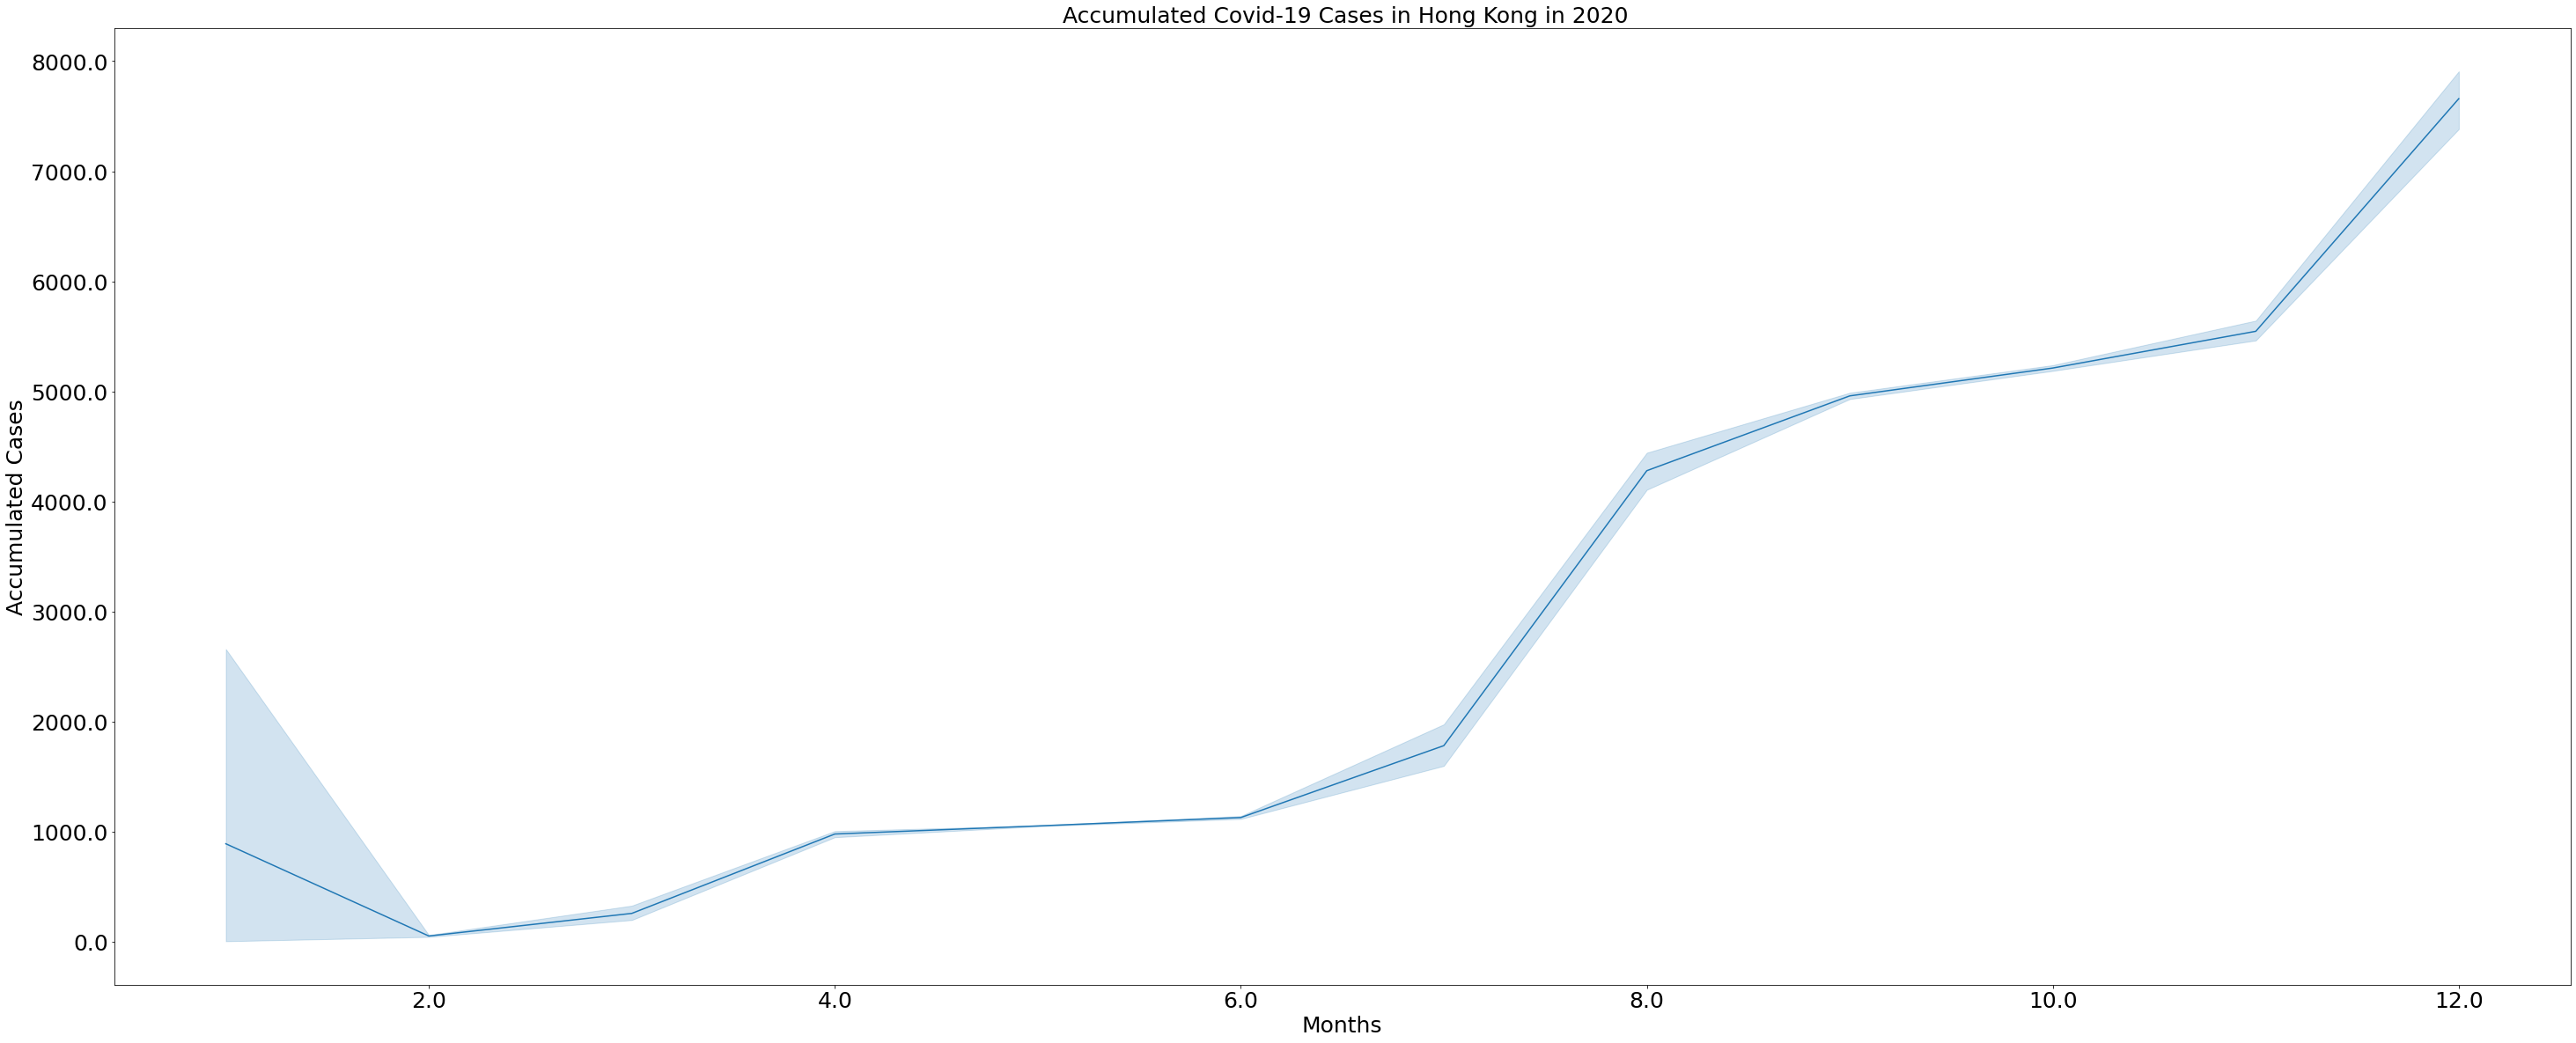

In [15]:
# Plotting monthly cases for better representation of accumulated cases
plt.figure(figsize = (50,20))
plot = sns.lineplot(x='Months', y="Confirmed", data=data)
plot.set_xlabel("Months", fontsize = 25)
plot.set_ylabel("Accumulated Cases", fontsize = 25)
plot.set_yticklabels(plot.get_yticks(), size = 25)
plot.set_xticklabels(plot.get_xticks(), size = 25)
plot.set_title(" Accumulated Covid-19 Cases in Hong Kong in 2020", fontsize = 25)
plt.show()

iv). Plotting the number of daily newly added cases reported in Hong Kong trending using
seaborn.lineplot.

In [16]:
# Last question

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("Covid19_HongKong.csv")
# Finding daily cases
df['Daily_Cases'] = df['Confirmed'].diff()
df.loc[1, 'Daily_Cases'] = df.loc[1, 'Confirmed']


In [17]:
# Plotting the number of daily added cases in Hong Kong
plt.figure(figsize = (400,150))
plt.xticks(fontsize=80, rotation=70)
sns.set_style("white")
p = sns.lineplot(x='Dates', y="Daily_Cases", data=df, color = 'red', linewidth = 10)
p.set_ylabel("Covid-19 Cases", fontsize = 200)
p.set_xlabel("Dates ( Days )", fontsize = 200)
p.set_yticklabels(p.get_yticks(), size = 200)
p.set_title("Daily newly added cases reported in Hong Kong" , fontsize = 200)
plt.show()

###  **Stay Safe and Stay Healthy**
